In [545]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [539]:
sales_LLY_19_18_ = pd.read_excel("/Users/GuntherUlvanget/Dropbox/NADAC_downloads/ELILILLY/IR workbook Q3 2019.xlsx",
                  sheet_name = ["2019 Revenue", "2018 Revenue"])

sales_LLY_17_ = pd.read_excel("/Users/GuntherUlvanget/Dropbox/NADAC_downloads/ELILILLY/IR workbook Q3 2018 with Balance Sheet revised.xlsx",
                            sheet_name = "2017 Revenue")
sales_LLY_16_ = pd.read_excel("/Users/GuntherUlvanget/Dropbox/NADAC_downloads/ELILILLY/IR_Workbook_Q1_2017_Excluding_Balance_Sheet.xlsx",
                            sheet_name = "2016 Revenue" )
sales_LLY_15_ = pd.read_excel("/Users/GuntherUlvanget/Dropbox/NADAC_downloads/ELILILLY/IR_workbook_Q1_2016.xlsx",
                            sheet_name ="2015 Revenue" )
sales_LLY_14_13_ = pd.read_excel("/Users/GuntherUlvanget/Dropbox/NADAC_downloads/ELILILLY/IR_workbook_Q4_2014.xls",
                              sheet_name = ["2014 Sales","2013 Sales"])

#separate 2019 and 2018 sales data from the dictionary. 
#First make itmes into a list of dataframes
#then assign each DF in df_list to variable 

df_list = list (sales_LLY_19_18_.items())
df_2_list = list (sales_LLY_14_13_.items())

sales_LLY_18_ = (df_list[1][1])
sales_LLY_19_ = df_list[0][1]
sales_LLY_13_ = df_2_list[1][1]
sales_LLY_14_ = df_2_list[0][1]
sales_LLY_14_.head(20)
#make a list of all dataframes

sales_list = [sales_LLY_13_, sales_LLY_14_, sales_LLY_15_, sales_LLY_16_, sales_LLY_17_, sales_LLY_18_, sales_LLY_19_]
year = str(sales_LLY_14_.at[0, "LLY"])
#sales_LLY_13_.head(15)
#1000000
#1000000

In [540]:
#make header list to ease removal and renaming of columns later
def clean_up(df):
    
    #rename columns and then drop all NaN
    colnames_list = []
    df.drop(df.columns[0], axis = 1, inplace = True)
    #remove all rows and columns that are all NaN
    
    df.dropna(axis = 1,how = "all", inplace = True)
    df.dropna(axis = 0,how = "all", inplace = True)
    df.reset_index(drop = True,inplace=True)
    header_list = list(df.columns) 
    
    year = str(df.at[0, "LLY"])
    
    
    #crete new header list using values from cells in df ie Quarter and Year
    #use dictionary to of existing header and new header , rename requires a dict k,v pair
    for i in range(df.shape[1]):
        colnames_list.append(str(df.at[1,header_list[i]]) + "_" + 
                             str(df.at[0, header_list[i]]))
    myDict = { k:v for (k,v) in zip(header_list, colnames_list)}
    df.rename(columns = myDict, inplace= True)
    
    df['year'] = year
    
    
    # remove the first column which has useless data
    df.drop(labels = ['0','1'],axis = 0, inplace = True )
    # the spreadsheets  rows contain an NA in the drug column
    # these rows are drug category aggragate information. Remove them
    df.dropna(subset=['drug'], inplace = True)
    df.reset_index(drop = True,inplace=True)
    #test if ints are scaled in millions ie 22 = 22 million or 22000000
    #convert 22 to 22000000 using if 
    min_vals = (df.iloc[0:6 + 1, 1:16].min()  >0) & (df.iloc[0:6 + 1, 1:16].min() < 100000)
    if min_vals.sum() > 0:
        df.iloc[0: , 1:16] = df.iloc[0: , 1:16]*1000000


    

In [541]:
[clean_up(df) for df in sales_list]

[None, None, None, None, None, None, None]

In [ ]:
#join all DF together, joining on the column headers, after made uniform    




result = pd.concat(sales_list, join = 'inner')



In [875]:
#LIST OF insulins/antiinsulin to subset

insulins = ["Humalog","Humalog(1)","Basaglar", "Humulin", "Glucagon"]
insulins_df=[]


#create data frames of each
for i in range(len(insulins)):
    insulins_df.append(result.loc[result['drug'] == insulins[i]])
#combine both humalog and humalog(1) footnote symbole from Eli Lilly
insulins_df[0] = pd.concat([insulins_df[0], insulins_df[1]])
del insulins_df[1]

In [877]:
#basaglar was new drug, missing data, added two rows of zeros to account for this 
#added rows at top
before_drug = [0]*14
before_drug[0] = "Basaglar"
before_drug2 = (before_drug).copy()
before_drug[13] = "2013"
before_drug2[13] = "2014"
colnames =["drug","US_Q1","Intl_Q1","Total_Q1","US_Q2","Intl_Q2","Total_Q2","US_Q3","Intl_Q3",	"Total_Q3",	"US_Q4"	,"Intl_Q4",	"Total_Q4",	"year"]
bfdf = (pd.DataFrame([before_drug, before_drug2], columns=colnames))

insulins_df[1] = pd.concat([bfdf, insulins_df[1]])
#insulins_df2 =pd.concat(insulins_df)


In [909]:
bfdf

,drug,US_Q1,Intl_Q1,Total_Q1,US_Q2,Intl_Q2,Total_Q2,US_Q3,Intl_Q3,Total_Q3,US_Q4,Intl_Q4,Total_Q4,year
0,Basaglar,0,0,0,0,0,0,0,0,0,0,0,0,2013
1,Basaglar,0,0,0,0,0,0,0,0,0,0,0,0,2014


In [879]:
insulins_us_qtr_ls = []
for i in range(len(insulins_df)):
    insulins_us_qtr_ls.append(insulins_df[i][["US_Q1","US_Q2","US_Q3","US_Q4"]])
#ins_us_qtr =insulins_df2[["drug","US_Q1","US_Q2","US_Q3","US_Q4","year"]]
#type(ins_us_qtr)
#ins_us_qtr.sort_values(by=["drug","year"], inplace = True)
#Humalog_df = (result.loc[ins_us_qtr['drug'] == "Humalog"] )
#Humalog_df

In [880]:
insulins_us_qtr_ls[0]

,US_Q1,US_Q2,US_Q3,US_Q4
6,3.782e+08,3.519e+08,3.578e+08,4.335e+08
6,3.754e+08,4.131e+08,415000000,4.241e+08
6,4.206e+08,3.997e+08,4.409e+08,511000000
10,361600000,420000000,378800000,524800000
10,449100000,390400000,414900000,463400000
3,5.041e+08,4.645e+08,3.656e+08,4.536e+08
4,4.486e+08,3.961e+08,3.562e+08,NaN


In [ ]:
ins_arr_list = []
for i in range(len(insulins_us_qtr_ls)):
    ins_arr_list.append(np.array(insulins_us_qtr_ls[i]).reshape(28,1)) 

In [902]:
insulins_array = np.hstack((ins_arr_list[0],ins_arr_list[1],ins_arr_list[2],ins_arr_list[3]))

In [898]:
dat = np.array(pd.date_range(start = '1/1/2013', end = '12/31/2019', freq = "Q"))

(ins_arr_list[0].shape)

(28, 1)

In [903]:
df = pd.DataFrame(insulins_array ,index = dat ,
                  
                  
                  
                  columns = ["Humalog","Basaglar", "Humulin","Glucagon"] )
df

,Humalog,Basaglar,Humulin,Glucagon
2013-03-31,3.782e+08,0,1.634e+08,1.68e+07
2013-06-30,3.519e+08,0,1.581e+08,2.22e+07
2013-09-30,3.578e+08,0,1.614e+08,2.84e+07
2013-12-31,4.335e+08,0,1.942e+08,22000000
2014-03-31,3.754e+08,0,1.548e+08,20000000
2014-06-30,4.131e+08,0,1.817e+08,2.45e+07
2014-09-30,415000000,0,1.658e+08,3.02e+07
2014-12-31,4.241e+08,0,2.109e+08,2.35e+07
2015-03-31,4.206e+08,0,1.795e+08,2.48e+07
2015-06-30,3.997e+08,0,1.881e+08,2.48e+07


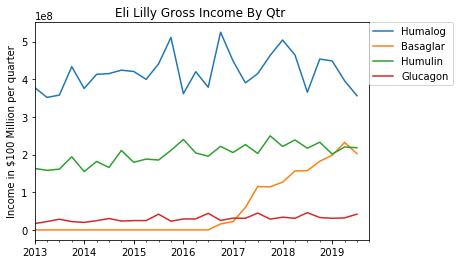

In [914]:
ax =df.plot(y=["Humalog","Basaglar", "Humulin","Glucagon"], use_index=True, title = "Eli Lilly Insulin income 2013-2018")

#ax = sns.lineplot(x= df.index, y="Sales", data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax.set_ylabel("Income in $100 Million per quarter")
ax.set_title("Eli Lilly Gross Income By Qtr ")
plt.savefig('elililly.png',bbox_inches='tight')

In [ ]:










def clean_up(df):
    
    #rename columns and then drop all NaN
    colnames_list = []
    df.drop(df.columns[0], axis = 1, inplace = True)
    #remove all rows and columns that are all NaN
    
    df.dropna(axis = 1,how = "all", inplace = True)
    df.dropna(axis = 0,how = "all", inplace = True)
    df.reset_index(drop = True,inplace=True)
    header_list = list(df.columns) 
    df.head()
    year = str(df.at[0, "LLY"])
    
    
    
    for i in range(df.shape[1]):
        colnames_list.append(str(df.at[1,header_list[i]]) + "_" + 
                             str(df.at[0, header_list[i]]))
    myDict = { k:v for (k,v) in zip(header_list, colnames_list)}
    df.rename(columns = myDict, inplace= True)
    # remove the first column which has useless data
    df['year'] = year
    
    df.rename(index=str, columns={"nan_nan":"drug"}, inplace = True)
    df.drop(labels = ['0','1'],axis = 0, inplace = True )
    df.reset_index(drop = True,inplace=True)
    min_vals = (df.iloc[:6 + 1, 1:16].min()  >0) & (df.illoc[:6 + 1, 1:16].min() < 100000)
    if min_vals.sum() > 0:
        df.iloc[0: , 1:16] = df.iloc[0: , 1:16]*1000000

#insulins_df                               
#insulins_df    
#Humalog_df = pd.DataFrame(result.loc[result['drug'] == "Humalog"] )
#Humalog_df.concat(result.loc[result['drug'] == "Humalog(1)"])
#Humalog_df
#Basaglar_df = (result.loc[result['drug'] == "Basaglar"])


#Humulin_df = (result.loc[result["drug"]== "Humulin"])


#Glucagon_df = (result.loc[result["drug"] == "Glucagon"])
#Humalog_df













